In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

crowdness = pd.read_csv('crowdness_gym_data.csv')

# Initial Thoughts

In [50]:
crowdness.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,log_number_people
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460,2.728964
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631,1.486172
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000,2.197225
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000,3.332205
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000,3.761200
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000,4.976734


crowdness.drop('date', axis=1)
crowdness.drop('timestamp', axis=1)

(array([1.8097e+04, 1.3651e+04, 1.5001e+04, 8.3430e+03, 4.4000e+03,
        1.8710e+03, 6.5600e+02, 1.4400e+02, 1.7000e+01, 4.0000e+00]),
 array([  0. ,  14.5,  29. ,  43.5,  58. ,  72.5,  87. , 101.5, 116. ,
        130.5, 145. ]),
 <BarContainer object of 10 artists>)

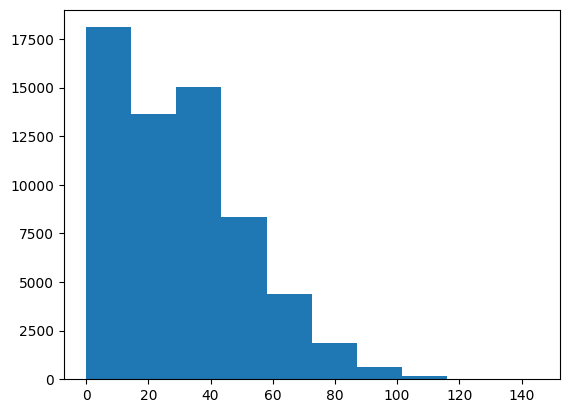

In [15]:
plt.hist(crowdness['number_people'])

Looks like we need to log transform our y variable in order to get a more normal distribution. Lets try that below.

(array([11804.,  1143.,   992.,   996.,  2060.,  4882., 14557., 16781.,
         8309.,   660.]),
 array([0.        , 0.49767337, 0.99534675, 1.49302012, 1.9906935 ,
        2.48836687, 2.98604025, 3.48371362, 3.98138699, 4.47906037,
        4.97673374]),
 <BarContainer object of 10 artists>)

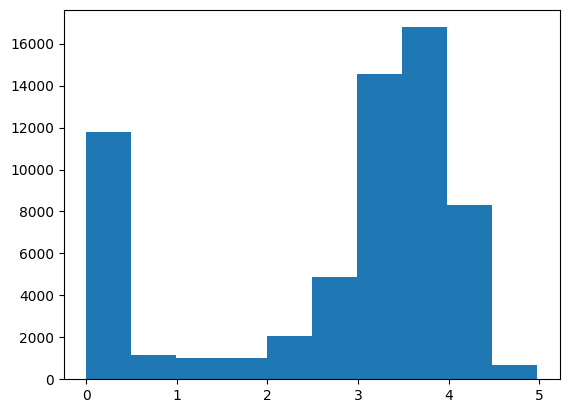

In [16]:
crowdness['log_number_people'] = crowdness['number_people'].apply(lambda x: np.log(x) if x!=0 else 0)
plt.hist(crowdness['log_number_people'])

This does not look much better, so let's use the non-transformed series as our y variable.

<AxesSubplot:title={'center':'number_people'}, xlabel='day_of_week'>

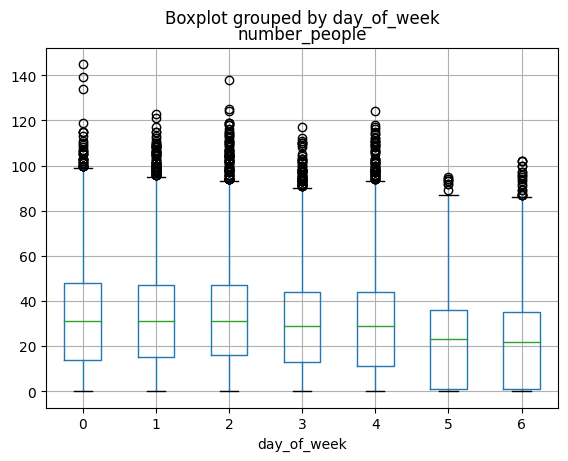

In [21]:
crowdness.boxplot(column='number_people', by='day_of_week')

<AxesSubplot:title={'center':'number_people'}, xlabel='month'>

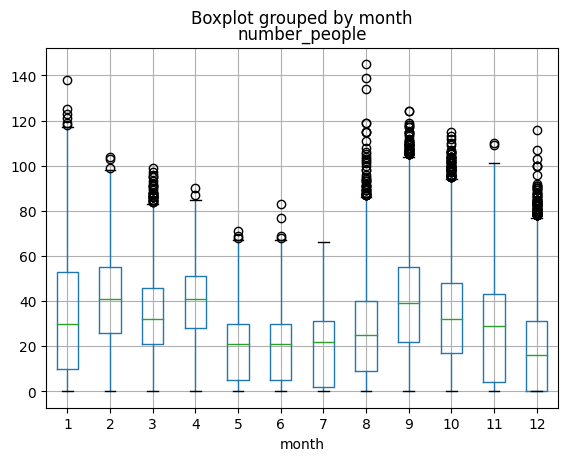

In [22]:
crowdness.boxplot(column='number_people', by='month')

<AxesSubplot:title={'center':'number_people'}, xlabel='hour'>

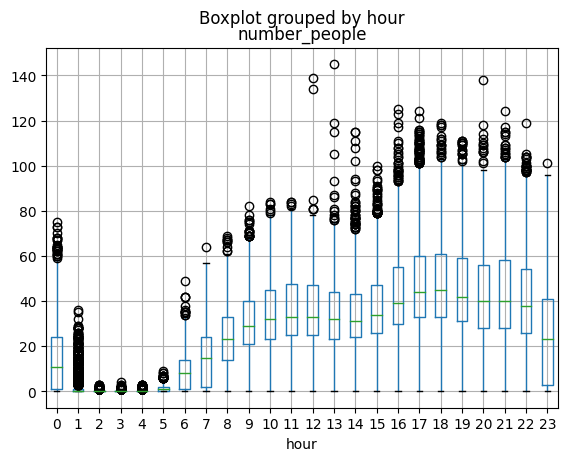

In [23]:
crowdness.boxplot(column='number_people', by='hour')

<AxesSubplot:title={'center':'number_people'}, xlabel='is_weekend'>

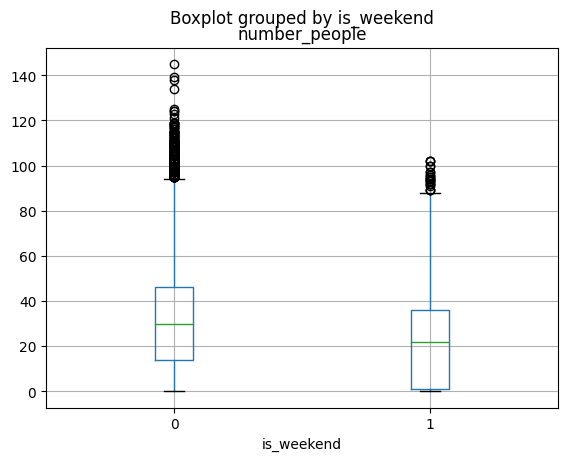

In [24]:
crowdness.boxplot(column='number_people', by='is_weekend')

In [25]:
crowdness.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,log_number_people
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049,0.864233
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077,0.572454
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914,-0.152855
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517,-0.171354
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843,-0.052491
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121,0.385905
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091,0.103960
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581,0.250343
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624,-0.120086
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000,0.574075


# Regression Analysis

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [48]:
X = crowdness.drop(['number_people','log_number_people','timestamp','date'], axis=1)
y= crowdness['number_people']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
sgdr = SGDRegressor(eta0=0.0001, tol=0.00001, max_iter=1000)
sgdr.fit(X_train,y_train)
y_pred = sgdr.predict(X_test)
train_pred = sgdr.predict(X_train)

In [49]:
mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, train_pred)
print(f'The mean squared error is {mse}')
print(f'The mean squared error of the prediction on the training set is {train_mse}')
r2 = r2_score(y_test,y_pred)
print(f'The R^2 is {r2}')

The mean squared error is 268.2739527065784
The mean squared error of the prediction on the training set is 268.9071868034051
The R^2 is 0.4809419622418397


Our mse for both the training and validation predictions are roughly similar, suggesting that we did not overfit the model. Our rmse is fairly high at ~16, given that the number of people mean is 29 with a std. deviation of 22.7. We could likely make improvements on the model, however this sgdr is a good place to start.

# Visualizing Results

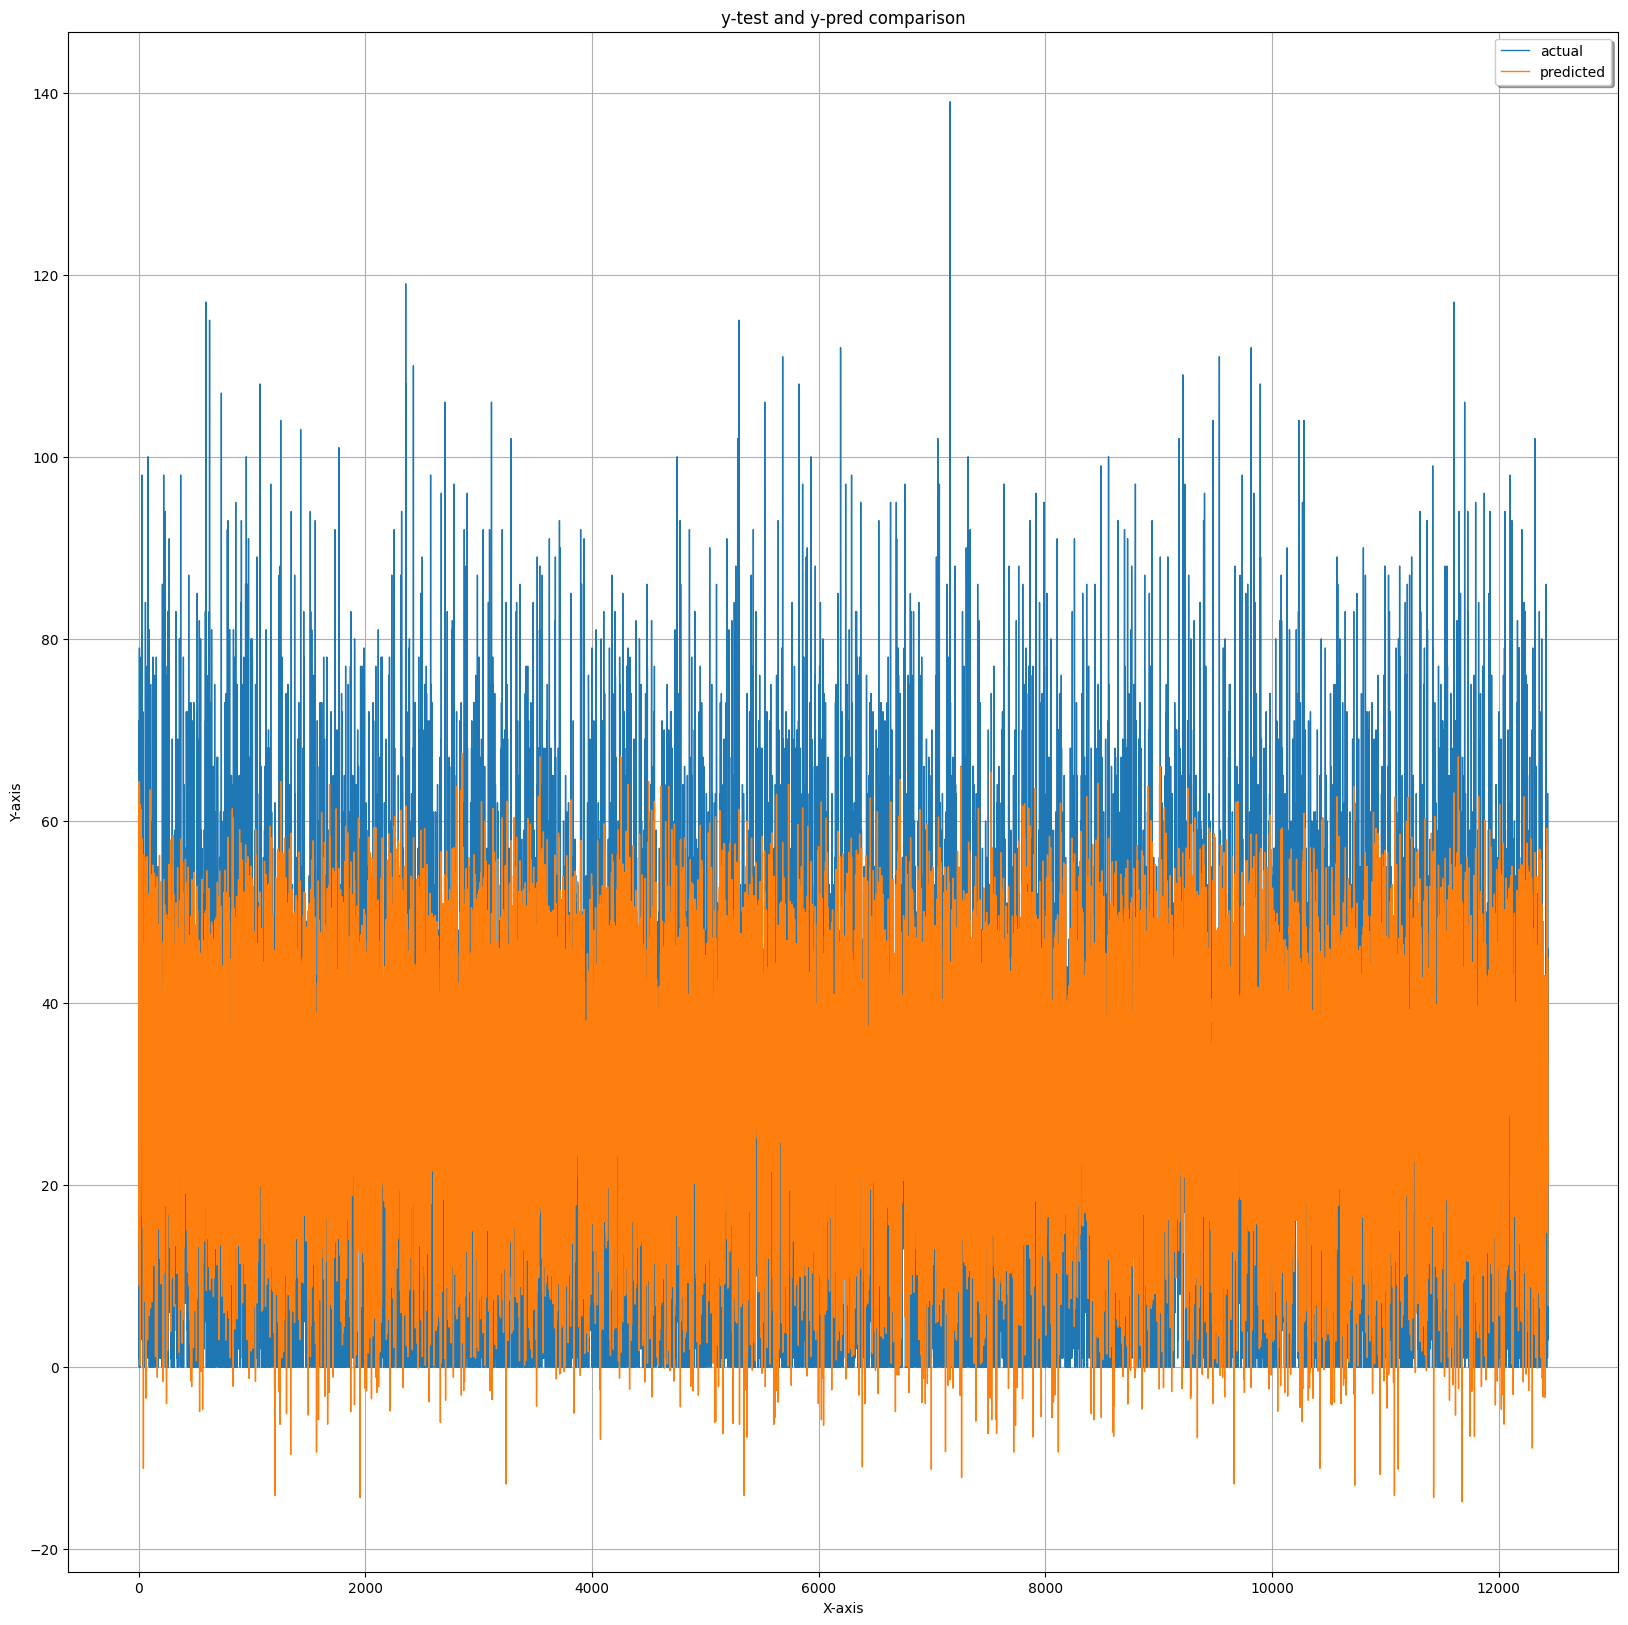

In [59]:
plt.figure(figsize=(20,20))

plt.plot(range(len(X_test)), y_test, linewidth=1, label='actual')    
plt.plot(range(len(X_test)), y_pred, linewidth=1, label='predicted')
plt.title("y-test and y-pred comparison")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 